# Tests

## Example 1: Simple

In [1]:
import sys

sys.path.insert(0, "/home/twright/Documents/PhD/Notebooks")

from flowstar.reachability import Reach
from flowstar.poly import Poly
from ulbc import *

In [2]:
kwargs = {
    'symbolic_composition': True,
}

In [3]:
R.<t,x,y> = RIF[]

In [4]:
odes = [
    R(1),
    -y,
    x,
]
initials = [(0,0), (4,5), (1,2)]
system = System(
    R,
    [t, x, y],
    initials,
    odes,
)
reach = system.reach(2*pi, step=0.1, order=10,
              precompose_taylor_models=False,
              symbolic_composition=False)
reach_sc = system.reach(2*pi, step=0.1, order=10,
              precompose_taylor_models=False,
              symbolic_composition=True)

calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.0000000000000000 .. 5.0000000000000000]', '[1.0000000000000000 .. 2.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [t, x, y]
C = [0.0..0.0]
C = [4.0..5.0]
C = [1.0..2.0]
assigning system with dimension 3
resulting system has dimension 3
run within tmv args
integrationScheme = 2
calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.0000000000000000 .. 5.0000000000000000]', '[1.0000000000000000 .. 2.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [t, x, y]
C = [0.0..0.0]
C = [4.0..5.0]
C = [1.0..2.0]
assigning system with dimension 3
resulting system has dimension 3
run within tmv args
integrationScheme = 2


In [5]:
def plot_signal(sig):
    return sig.to_domain(RIF(0,2*pi)).plot().show(
        ticks=[pi/2, 1], tick_formatter=pi, aspect_ratio=2/3)

In [6]:
reach.res

2

In [7]:
S = Atomic(3 - y**2 + y); S

Atomic(-y^2 + y + 3)

PolyObserver(-y^2 + y + 3, <flowstar.reachability.Reach object at 0x7f2dba600ba0>, -2*x*y + x, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -2*x*y + x


/usr/lib64/python3.8/site-packages/numpy/core/getlimits.py:400: UserWarning: Signature b'\x99\x99\x99\x99\x99\x99\xb9\xbf' for <class 'numpy.float64'> does not match any known type: falling back to type probe function
  machar = _get_machar(dtype)


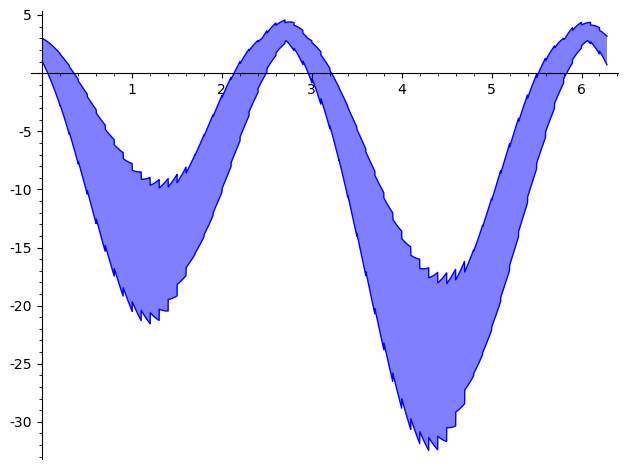

In [8]:
p1 = S.sage_plot(reach); p1

PolyObserver(-y^2 + y + 3, <flowstar.reachability.Reach object at 0x7f2dba600ba0>, -2*x*y + x, symbolic_composition=True, tentative_unpreconditioning=True, mask=None)
fprime = -2*x*y + x


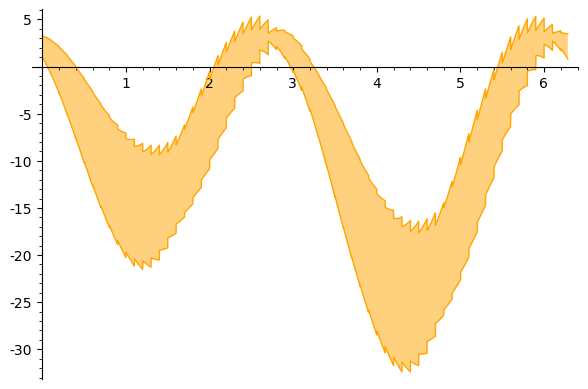

In [9]:
p2 = S.sage_plot(reach, symbolic_composition=True,
                color=('orange', 'orange'),
                fillcolor=('orange',)); p2

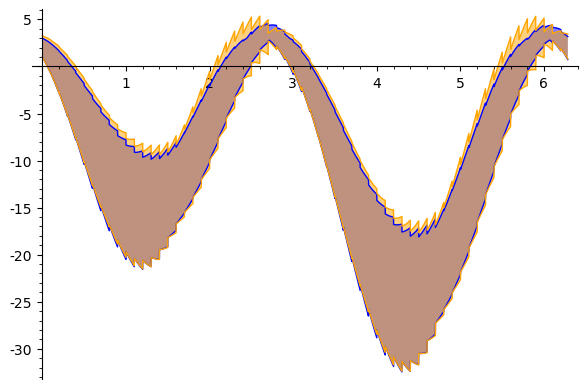

In [10]:
p1+p2

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.0000000000000000 .. 0.0000000000000000]', '[4.0000000000000000 .. 5.0000000000000000]', '[1.0000000000000000 .. 2.0000000000000000]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [t, x, y]
C = [0.0..0.0]
C = [4.0..5.0]
C = [1.0..2.0]
assigning system with dimension 3
resulting system has dimension 3
run within tmv args
integrationScheme = 2
Running Flow*: 1 items in 0.04 seconds
Computed 63 flowpipes in 0.041888463019859046 sec
PolyObserver(-y^2 + y + 3, <flowstar.reachability.Reach object at 0x7f2db2af19e0>, -2*x*y + x, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
fprime = -2*x*y + x
symbolic_composition=False, tentative_unpreconditioning=True,two_pass_masks=False
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.04 seconds
roots = [[0.059608151095034402 .. 0.35312852931153011], [2.1186147208572507 .. 2.50000000

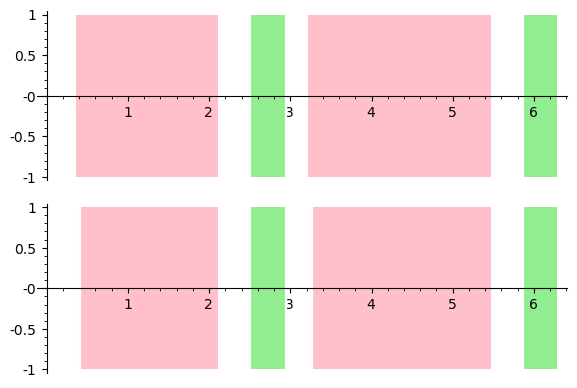

In [11]:
sig1 = S.signal_for_system(system, 2*pi, symbolic_composition=False)
sig2 = S.signal_for_system(system, 2*pi, symbolic_composition=True)

graphics_array([
    sig1.plot(),
    sig2.plot(),
], ncols=1)

In [12]:
sig1

Signal([0.0000000000000000 .. 6.2831853071795872], [([0.0000000000000000 .. 0.059608151095034403], True), ([0.35312852931153010 .. 2.1186147208572508], False), ([2.5000000000000022 .. 2.9583801173991474], True), ([3.2184294365198051 .. 5.4999999999999610], False), ([5.8391025229313306 .. 6.2831853071795872], True)], mask=None)

In [13]:
sig2

Signal([0.0000000000000000 .. 6.2831853071795872], [([0.0000000000000000 .. 0.059456098390765725], True), ([0.40000000000000007 .. 2.0999999999999948], False), ([2.5000000000000022 .. 2.9642242313394669], True), ([3.2439956708126866 .. 5.4999999999999610], False), ([5.9000000000000136 .. 6.2831853071795872], True)], mask=None)